In [1]:
!pip install music21

In [2]:
!pip install midi2audio

In [3]:
!pip install fluidsynth

  Created wheel for fluidsynth: filename=fluidsynth-0.2-cp36-none-any.whl size=4513 sha256=1c8c3f4bb42938d29b6839d49fcde9a18811dbe7a1e734e4788ae15828aacc8a
  Stored in directory: /root/.cache/pip/wheels/2d/70/4d/ffe2589bbfe9c268780570a6875583fbf59547004459e2c3c3
Successfully built fluidsynth


In [4]:
!apt install fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 35 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ub

In [5]:
# ต้องใช้ sound font ด้วย ลองหา .sf2 ก่อน
!find / -name *.sf2

/usr/share/sounds/sf2/FluidR3_GM.sf2
/usr/local/lib/python2.7/dist-packages/pretty_midi/TimGM6mb.sf2
/tensorflow-1.15.2/python3.6/pretty_midi/TimGM6mb.sf2


In [6]:
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
cd './drive/My Drive/Automated Music Generation'

/content/drive/My Drive/Automated Music Generation


In [9]:
!unzip 'schubert.zip' -d './../../../Midi_files'

Archive:  schubert.zip
  inflating: ./../../../Midi_files/schubert_D850_1.mid  
  inflating: ./../../../Midi_files/schubert_D850_2.mid  
  inflating: ./../../../Midi_files/schubert_D850_3.mid  
  inflating: ./../../../Midi_files/schubert_D850_4.mid  
  inflating: ./../../../Midi_files/schubert_D935_1.mid  
  inflating: ./../../../Midi_files/schubert_D935_2.mid  
  inflating: ./../../../Midi_files/schubert_D935_3.mid  
  inflating: ./../../../Midi_files/schubert_D935_4.mid  
  inflating: ./../../../Midi_files/schub_d760_1.mid  
  inflating: ./../../../Midi_files/schub_d760_2.mid  
  inflating: ./../../../Midi_files/schub_d760_3.mid  
  inflating: ./../../../Midi_files/schub_d760_4.mid  
  inflating: ./../../../Midi_files/schub_d960_1.mid  
  inflating: ./../../../Midi_files/schub_d960_2.mid  
  inflating: ./../../../Midi_files/schub_d960_3.mid  
  inflating: ./../../../Midi_files/schub_d960_4.mid  
  inflating: ./../../../Midi_files/schuim-1.mid  
  inflating: ./../../../Midi_files/schu

In [10]:
cd './../../../'

/content


In [11]:
from midi2audio import FluidSynth

In [12]:
from music21 import *
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [14]:
from encoding_utils import *
from helper_functions import *

In [22]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
 
    chord_arr = stream2chordarr(s2)
    x = chordarr2npenc(chord_arr)
    notes = convert_npenc(x, vocab, padd_bos=False)

    return np.array(notes)

In [16]:
import os

#Array Processing
import numpy as np

#specify the path
path='./Midi_files/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

In [23]:
x =read_midi(path+files[1])

Loading Music File: ./Midi_files/schuim-1.mid


In [25]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='./Midi_files/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: ./Midi_files/schub_d960_2.mid
Loading Music File: ./Midi_files/schuim-1.mid
Loading Music File: ./Midi_files/schubert_D935_3.mid
Loading Music File: ./Midi_files/schumm-2.mid
Loading Music File: ./Midi_files/schubert_D850_2.mid
Loading Music File: ./Midi_files/schu_143_2.mid
Loading Music File: ./Midi_files/schub_d960_3.mid
Loading Music File: ./Midi_files/schumm-1.mid
Loading Music File: ./Midi_files/schub_d760_2.mid
Loading Music File: ./Midi_files/schumm-4.mid
Loading Music File: ./Midi_files/schub_d760_4.mid
Loading Music File: ./Midi_files/schubert_D935_2.mid
Loading Music File: ./Midi_files/schub_d960_4.mid
Loading Music File: ./Midi_files/schub_d760_3.mid
Loading Music File: ./Midi_files/schuim-2.mid
Loading Music File: ./Midi_files/schumm-6.mid
Loading Music File: ./Midi_files/schubert_D935_1.mid
Loading Music File: ./Midi_files/schub_d960_1.mid
Loading Music File: ./Midi_files/schubert_D850_1.mid
Loading Music File: ./Midi_files/schuim-4.mid
Loading Music F

In [29]:
textify_seq(notes_array[1][:], reverse_vocab)[0:15]

['n79',
 'd12',
 'n67',
 'd12',
 'n43',
 'd12',
 'n31',
 'd12',
 'xxsep',
 'd12',
 'n71',
 'd3',
 'xxsep',
 'd3',
 'n72']

In [82]:
time_steps = 200
x = []
y = []

for notes in notes_array:
  for i in range(0, len(notes)-2*time_steps-1):
    input = notes[i:i+time_steps]
    output = notes[i+time_steps:i+2*time_steps+1]
    x.append(input)
    y.append(output)

x = np.array(x)
y = np.array(y)

In [83]:
from sklearn.model_selection import train_test_split as tts
x_train, x_val, y_train, y_val = tts(x, y, test_size = 0.15, random_state=0)

In [84]:
x_vocab = 4+256+128
y_vocab = 4+256+128

BUFFER_SIZE = len(x_train)
BATCH_SIZE = 128
steps_per_epoch = len(x_train)//BATCH_SIZE
embedding_dim = 256
units = 1024

In [85]:
x_train_tensor = tf.convert_to_tensor(x_train)
y_train_tensor = tf.convert_to_tensor(y_train)
x_val_tensor = tf.convert_to_tensor(x_val)
y_val_tensor = tf.convert_to_tensor(y_val)

dataset = tf.data.Dataset.from_tensor_slices((x_train_tensor, y_train_tensor)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
validation_data = tf.data.Dataset.from_tensor_slices((x_val_tensor, y_val_tensor)).batch(BATCH_SIZE, drop_remainder=True)

In [86]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([128, 200]), TensorShape([128, 201]))

In [87]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [88]:
def positional_encoding(pos, d_model):
  angles_rad = get_angles(np.arange(pos)[:,np.newaxis],np.arange(d_model)[np.newaxis, :], d_model)

  angles_rad[:,0::2] = np.sin(angles_rad[:,0::2])

  angles_rad[:,1::2] = np.cos(angles_rad[:,1::2])

  pos_encoding = angles_rad[np.newaxis, ...]
  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 50, 512)


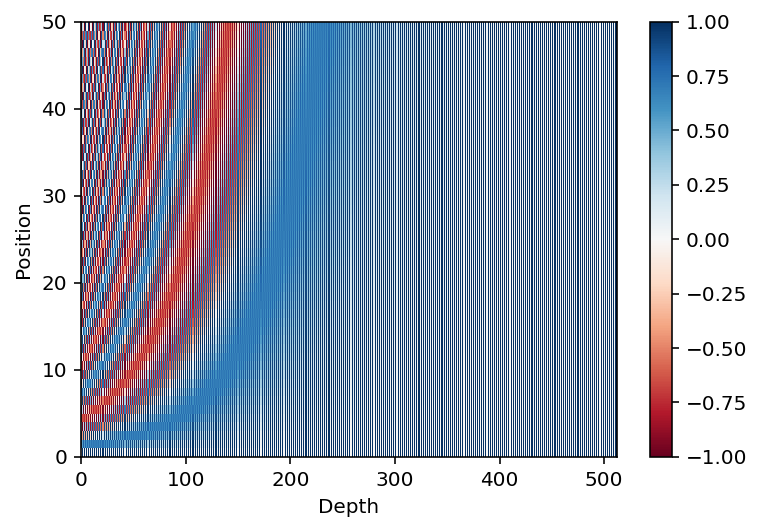

In [89]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [90]:
def create_padding_mask(seq):
  seq=tf.cast(tf.math.equal(seq,0), tf.float32)

  return seq[:,tf.newaxis, tf.newaxis,:]

In [91]:
def lookahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask

In [92]:
def scaled_dot_product_attention(q, k, v, mask):

  matmul_qk = tf.matmul(q, k, transpose_b=True)  

  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1) 

  output = tf.matmul(attention_weights, v)  

  return output, attention_weights


In [93]:
class MultiheadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiheadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model
    
    assert d_model % self.num_heads == 0
    
    self.depth = d_model // self.num_heads
    
    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)
        
  def split_heads(self, x, batch_size):
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
    
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    q = self.wq(q)  
    k = self.wk(k)  
    v = self.wv(v)  

    q = self.split_heads(q, batch_size)  
    k = self.split_heads(k, batch_size)  
    v = self.split_heads(v, batch_size)  

    scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
    
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

    concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))  

    output = self.dense(concat_attention) 
        
    return output, attention_weights

In [94]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model)
  ])

In [95]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiheadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  
    
    ffn_output = self.ffn(out1)  
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output) 
    
    return out2

In [96]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiheadAttention(d_model, num_heads)
    self.mha2 = MultiheadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask) 
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  
    
    ffn_output = self.ffn(out2)  
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  
    
    return out3, attn_weights_block1, attn_weights_block2

In [97]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                            self.d_model)
    
    
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
  
    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]
    
    x = self.embedding(x) 
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)
    return x 

In [98]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print (sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


In [99]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}
    
    x = self.embedding(x) 
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]
    
    x = self.dropout(x, training=training)
    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    return x, attention_weights

In [100]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)

    final_output = self.final_layer(dec_output) 
    
    return final_output, attention_weights

In [101]:
num_layers = 2
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1
px_vocab = time_steps
py_vocab = time_steps

In [102]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.3)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [103]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
train_loss = tf.keras.metrics.Mean(name='train_loss')
val_loss = tf.keras.metrics.Mean(name='validation_loss')

In [104]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          x_vocab, y_vocab, 
                          pe_input=px_vocab, 
                          pe_target=py_vocab,
                          rate=dropout_rate)

Text(0.5, 0, 'Train Step')

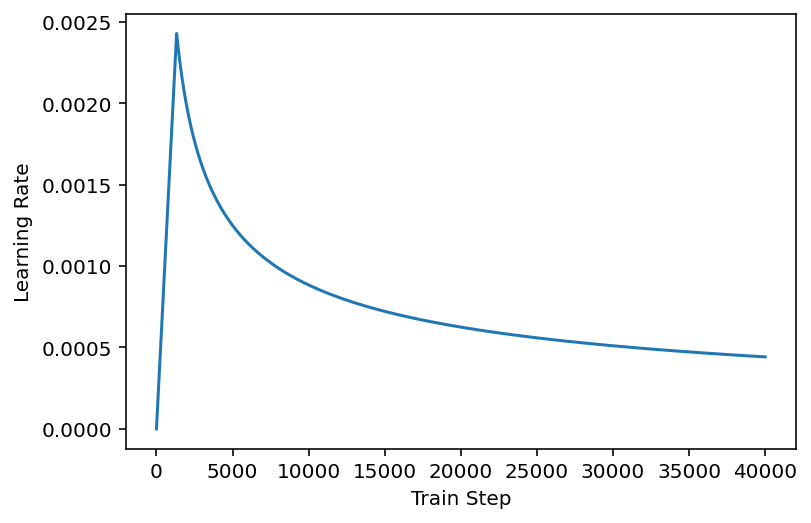

In [105]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [106]:
checkpoint_dir = './training_checkpoints'
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 transformer = transformer)
ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=5)


In [107]:
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, targ):
  loss = 0
  tar_inp = targ[:,:-1]
  tar_real = targ[:,1:]

  look_ahead_mask = lookahead_mask(tf.shape(tar_inp)[1])
  enc_padding_mask = None
  dec_padding_mask = None
  
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 look_ahead_mask, 
                                 dec_padding_mask)
    loss = loss_object(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)

In [108]:
val_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]
@tf.function(input_signature=val_step_signature)
def validation_step(inp, targ):
  loss = 0
  tar_inp = targ[:,:-1]
  tar_real = targ[:,1:]

  look_ahead_mask = lookahead_mask(tf.shape(tar_inp)[1])
  enc_padding_mask = None
  dec_padding_mask = None
  
  prob, _ = transformer(inp, tar_inp, 
                              False, 
                              enc_padding_mask, 
                              look_ahead_mask, 
                              dec_padding_mask)
  loss = loss_object(tar_real, prob)
  val_loss(loss)

In [109]:
validation_step(example_input_batch, example_target_batch)

In [110]:
val_loss.result()

<tf.Tensor: shape=(), dtype=float32, numpy=6.1288676>

In [111]:
EPOCHS = 20
Best_loss = 1000000

for epoch in range(EPOCHS):
  train_loss.reset_states()
  val_loss.reset_states()

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    train_step(inp, targ)

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   train_loss.result()))
  
  for (inp, targ) in validation_data:
    validation_step(inp, targ)
  
  
  print('Epoch: {}, Train_Loss: {:.4f},  Validation_loss: {:.4f}'.format(epoch + 1,
                                      train_loss.result(), val_loss.result()))
  
  
  if val_loss.result()<Best_loss or (epoch+1)%4==0:
    Best_loss = val_loss.result()
    print("Saving Model Checkpoint....................")
    ckpt_manager.save()

Epoch 1 Batch 0 Loss 6.1161
Epoch 1 Batch 100 Loss 4.1902
Epoch 1 Batch 200 Loss 3.3421
Epoch 1 Batch 300 Loss 2.9336
Epoch 1 Batch 400 Loss 2.6728
Epoch 1 Batch 500 Loss 2.4547
Epoch 1 Batch 600 Loss 2.2742
Epoch 1 Batch 700 Loss 2.1255
Epoch 1 Batch 800 Loss 2.0017
Epoch 1 Batch 900 Loss 1.8971
Epoch 1 Batch 1000 Loss 1.8062
Epoch 1 Batch 1100 Loss 1.7264
Epoch 1 Batch 1200 Loss 1.6553
Epoch 1 Batch 1300 Loss 1.5911
Epoch 1 Batch 1400 Loss 1.5323
Epoch 1 Batch 1500 Loss 1.4780
Epoch 1 Batch 1600 Loss 1.4277
Epoch 1 Batch 1700 Loss 1.3810
Epoch 1 Batch 1800 Loss 1.3377
Epoch 1 Batch 1900 Loss 1.2972
Epoch 1 Batch 2000 Loss 1.2594
Epoch 1 Batch 2100 Loss 1.2240
Epoch: 1, Train_Loss: 1.2118,  Validation_loss: 0.3424
Saving Model Checkpoint....................
Epoch 2 Batch 0 Loss 0.4876
Epoch 2 Batch 100 Loss 0.4851
Epoch 2 Batch 200 Loss 0.4773
Epoch 2 Batch 300 Loss 0.4677
Epoch 2 Batch 400 Loss 0.4600
Epoch 2 Batch 500 Loss 0.4527
Epoch 2 Batch 600 Loss 0.4455
Epoch 2 Batch 700 Loss 

KeyboardInterrupt: ignored

In [112]:
checkpoint.restore(ckpt_manager.latest_checkpoint)

In [113]:
val_loss.reset_states()
for (inp, targ) in validation_data:
    validation_step(inp, targ)

print(val_loss.result())

tf.Tensor(0.072711155, shape=(), dtype=float32)


In [135]:
import random
import music21

def generate_music(Notes_len=200, filename='music.mid'):
    ind = np.random.randint(0,len(x_val)-1)
    while(x_val[ind][0]>132):
        ind = np.random.randint(0,len(x_val)-1) 

    input = x_val[ind]
    input = tf.expand_dims(input, 0)

    output = y_val[ind][:1]

    predictions=[y_val[ind][0]]

    for i in range(Notes_len-1):
      targ_inp = tf.expand_dims(tf.cast(output, tf.float32),0)
      look_ahead_mask = lookahead_mask(tf.shape(targ_inp)[1])
      enc_padding_mask = None
      dec_padding_mask = None

      prob, _ = transformer(input, targ_inp, 
                                False, 
                                enc_padding_mask, 
                                look_ahead_mask, 
                                dec_padding_mask)
      
      y_pred= tf.argmax(prob[:,-1,:], axis = -1).numpy()
      predictions.append(y_pred[0])
      
      output = np.insert(output,len(output),y_pred)
    
    predicted_notes = predictions

    def convert_to_midi(prediction_output, filename):
        output_notes = []
        output_notes = deconvert_npenc(prediction_output)
        chord = npenc2chordarr(output_notes)
        midi_stream = chordarr2stream(chord)
        midi_stream.write('midi', fp=filename)

    convert_to_midi(predicted_notes, filename)
    
    return predicted_notes

In [136]:
for i in range(1, 5):
  _ = generate_music(filename=str('./music_' + str(i) + '_.mid'))

In [137]:
!fluidsynth -ni font.sf2 './music_1_.mid' -F 'output_1.wav' -r 44100
!fluidsynth -ni font.sf2 './music_2_.mid' -F 'output_2.wav' -r 44100
!fluidsynth -ni font.sf2 './music_3_.mid' -F 'output_3.wav' -r 44100
!fluidsynth -ni font.sf2 './music_4_.mid' -F 'output_4.wav' -r 44100

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_1.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_2.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_3.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_4.wav'..


In [138]:
from IPython.display import display
from IPython.display import Audio

In [139]:
display(Audio('output_1.wav'))
display(Audio('output_2.wav'))
display(Audio('output_3.wav'))
display(Audio('output_4.wav'))

In [141]:
pred = generate_music(Notes_len=200, filename=str('./music_'+ '_5.mid'))

In [148]:
!fluidsynth -ni font.sf2 './music__5.mid' -F 'output_5.wav' -r 44100

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_5.wav'..


In [149]:
display(Audio('output_5.wav'))